In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy import interpolate, stats
import itertools 

import time

import networkx as nx
from networkx.algorithms import approximation as apx

#import pandas as pd
#import random

import landscape as ld
import steiner_utils as su

In [3]:
def get_pos(g):
    '''returns dictionary with nodes physical location'''
    return dict( (n, n) for n in g.nodes() )

# Compute timing
Points selected at random. 

In [4]:
L0 = 10; Nterm = 10
terminals_2 = su.make_random_terminals(box_size = L0, Nterminals = Nterm)
G_2 = su.create_graph(box_size = L0, terminals = terminals_2)
su.graph_info(G_2, verbosity = False)

(1, 81, 144, 7)

In [11]:
tic = time.time()
steiner_2 = su.naive_steiner(G_2)

toc = time.time()
print('Calculation took {} sec'.format(toc-tic))
print('Length of Steiner tree {}'.format(len(steiner_2)))  

Calculation took 0.028564929962158203 sec
Length of Steiner tree 21


In [6]:
def time_steiner(L0, Nterm):
    terminals = su.make_random_terminals(box_size = L0, Nterminals = Nterm)
    G = su.create_graph(box_size = L0, terminals = terminals)
    
    info = su.graph_info(G, verbosity = False)
    
    tic = time.time()
    steiner = su.naive_steiner(G)

    toc = time.time()
    
    return (info, (toc-tic))

## Vary L0

In [59]:
varyL0 = [time_steiner(L0, 20) for L0 in range(10,41,2)]

In [60]:
varyL0

[((1, 81, 144, 2), 0.03021693229675293),
 ((1, 121, 220, 2), 0.06158924102783203),
 ((1, 169, 312, 2), 0.12273669242858887),
 ((1, 225, 420, 2), 0.25523900985717773),
 ((1, 289, 544, 2), 0.49970388412475586),
 ((1, 361, 684, 2), 0.6802310943603516),
 ((1, 441, 840, 2), 1.1548058986663818),
 ((1, 529, 1012, 2), 1.8995640277862549),
 ((1, 625, 1200, 2), 2.2401950359344482),
 ((1, 729, 1404, 2), 4.693856954574585),
 ((1, 841, 1624, 2), 5.688822031021118),
 ((1, 961, 1860, 2), 6.841279029846191),
 ((1, 1089, 2112, 2), 10.754734992980957),
 ((1, 1225, 2380, 2), 17.72525191307068),
 ((1, 1369, 2664, 2), 21.699496030807495),
 ((1, 1521, 2964, 2), 20.495218992233276)]

In [61]:
X, Y = [x[-2] for x,y in varyL0], [y for x,y in varyL0]

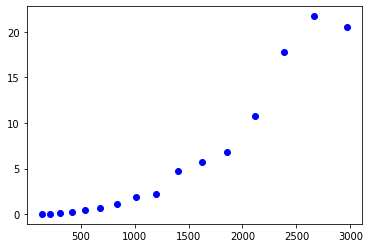

In [62]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line = ax.plot(X, Y, 'o', color='blue')

## vary Nterm

In [85]:
varyNterm = [(Nterm, time_steiner(30, Nterm)) for Nterm in range(10,61,4)]

In [86]:
X, Y = [x for x,y in varyNterm], [y for x,y in varyNterm]

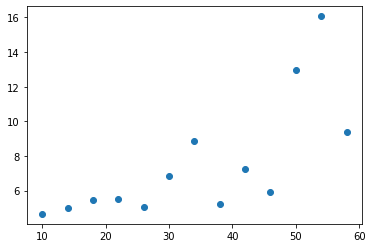

In [87]:
plt.plot(X,Y,'o')

# Shortest path

In [76]:
L0 = 40; Nterm = 2
terminals_3 = su.make_random_terminals(box_size = L0, Nterminals = Nterm)
G_3 = su.create_graph(box_size = L0, terminals = terminals_3)
su.graph_info(G_3, verbosity = False)

(1, 1521, 2964, 2)

In [92]:
def time_shortest_path(L0):
    
    terminals = su.make_random_terminals(box_size = L0, Nterminals = 2)
    G = su.create_graph(box_size = L0, terminals = terminals)
    info = su.graph_info(G, verbosity = False)
    
    s, t = terminals
    
    tic = time.time()
    nx.algorithms.shortest_path(G, source = s, target = t)
    toc = time.time()
    
    return (info, (toc-tic))

In [164]:
allY = []
for i in range(30):
    TimingsShortestPath = [time_shortest_path(L0) for L0 in range(10,61,2)]
    X = [x[2] for x,y in TimingsShortestPath]
    Y = np.array([y for x,y in TimingsShortestPath])
    allY.append(Y)

In [165]:
meanY = np.mean(allY, axis= 0)

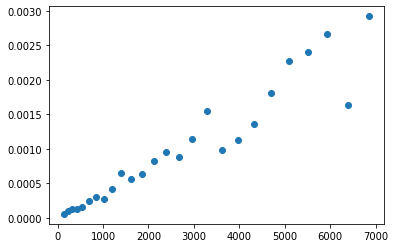

In [166]:
plt.plot(X,meanY,'o');

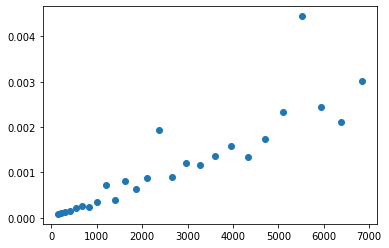

In [163]:
plt.plot(X,meanY,'o');